# About Dataset
The dataset is a comprehensive collection of ecological and environmental measurements focused on tree characteristics and site conditions. Each record in the dataset represents a distinct tree or plot, with the following features


Plot_ID: A unique identifier for each plot where measurements are taken. This helps in distinguishing between different locations within the study area.a.

Latitude: The geographical latitude of th is plot, measured in degrees. This indicates the north-south position of the plot on the Earth's surace.

Longitude: The geographical longitude of the plot, measured in degrees. This indicates the east-west position of the plot.

DBH (Diameter at Breast Heitree's diameterf the tree measured at 1.3 meters (or breast height) above ground level, typically expressed in centimeters. This metric is crucial for assessing tree size and health.

Tree_Height: The total height of the tree from the base to the top, measured in meters. This measurement helps in understanding the growth patterns and ecological role of the tree.

Crown_Width_North_South: The width of the tree's crown measured in the north-south direction, typically in meters. This dimension can indicate the tree's overall health and competitive status in the ecosystem.

Crown_Width_East_West: The width of the tree's crown measured in the east-west direction, also typically in meters. Together with crown width in the north-south direction, it provides a complete view of the tree's canopy size.

Slope: The steepness of the terrain where the tree is located, measured in degrees. This can influence water drainage, soil erosion, and root development.

Elevation: The height of the plot above sea level, measured in meters. Elevation can affect temperature, precipitation, and overall ecosystem dynamics.

Temperature: The average temperature recorded at the plot, measured in degrees Celsius. This factor can influence tree growth, health, and species distribution.

Humidity: The average humidity at the plot, expressed as a percentage. Humidity levels can affect transpiration rates and overall tree health.

Soil_TN (Total Nitrogen): The concentration of total nitrogen in the soil, measured in grams per kilogram (g/kg). Nitrogen is essential for plant growth and development.

Soil_TP (Total Phosphorus): The concentration of total phosphorus in the soil, also measured in grams per kilogram (g/kg). Phosphorus is crucial for energy transfer and photosynthesis.

Soil_AP (Available Phosphorus): The amount of phosphorus readily available to plants in the soil, measured in grams per kilogram (g/kg). This metric helps assess nutrient availability.

Soil_AN (Available Nitrogen): The amount of nitrogen available for plant uptake in the soil, measured in grams per kilogram (g/kg). This reflects soil fertility.

Menhinick_Index: A diversity index that reflects species richness in the area. Higher values indicate greater biodiversity.

Gleason_Index: Another diversity index that accounts for the abundance and richness of species within the community.

Disturbance_Level: A categorical variable indicating the level of ecological disturbance in the area (0: low, 1: medium, 2: high). This can impact the health and stability of the ecosystem.

Fire_Risk_Index: A measure of the likelihood of fire occurrence based on environmental conditions, scored between 0 and 1. This can inform management strategies for fire-prone areas.

Health_Status: A categorical variable indicating the health of the tree, classified as either 'Healthy' or 'Unhealthy.' This is important for understanding the impact of environmental factors on tree vitality.

In [113]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# modeling
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#create the dataframe
df = pd.read_csv('forest_health.csv')

#first five rows
df.head()

Plot_ID   Latitude   Longitude        DBH  Tree_Height  \
0        1  24.981605 -117.040695  29.862040    20.835684   
1        2  48.028572  -92.066934  28.462986    24.307079   
2        3  39.279758  -68.893791  91.094185     9.013101   
3        4  33.946339  -78.744258  28.706889    19.496475   
4        5  16.240746  -73.540720  30.835224    18.008888   

   Crown_Width_North_South  Crown_Width_East_West      Slope    Elevation  \
0                 6.147963               4.542720  29.171563   212.518419   
1                 8.248891               5.260921   7.757386   641.640332   
2                 7.841448               8.690927  39.257755  2510.612835   
3                 2.385099               4.060039  27.590231  2323.628233   
4                 2.343245               8.826847   7.074175  1116.863805   

   Temperature   Humidity   Soil_TN   Soil_TP   Soil_AP   Soil_AN  \
0    30.209377  93.086241  0.379904  0.268850  0.328882  0.487287   
1    29.054905  62.028839  0.339583  0.073260  0.044616  0.013501   
2     8.351397  77.992822  0.184392  0.297665  0.124953  0.474088   
3    37.290034  54.883864  0.611194  0.160819  0.387971  0.187495   
4    24.896527  70.402766  0.481858  0.030913  0.266699  0.009995   

   Menhinick_Index  Gleason_Index  Disturbance_Level  Fire_Risk_Index  \
0         0.682938       2.998681           0.004402         0.812948   
1         0.723696       3.986987           0.000330         0.678542   
2         2.129934       3.250667           0.472263         0.889075   
3         1.717352       1.333210           0.029294         0.449336   
4         2.476038       1.742321           0.974533         0.893890   

  Health_Status  
0       Healthy  
1  Very Healthy  
2       Healthy  
3     Unhealthy  
4     Unhealthy

In [3]:
#the dimension of the dataset
df.shape

(1000, 20)

In [4]:
#duplicates?
df.duplicated().sum()

0

In [5]:
#null values??
df.isna().sum()

Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Temperature                0
Humidity                   0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64

In [6]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plot_ID                  1000 non-null   int64  
 1   Latitude                 1000 non-null   float64
 2   Longitude                1000 non-null   float64
 3   DBH                      1000 non-null   float64
 4   Tree_Height              1000 non-null   float64
 5   Crown_Width_North_South  1000 non-null   float64
 6   Crown_Width_East_West    1000 non-null   float64
 7   Slope                    1000 non-null   float64
 8   Elevation                1000 non-null   float64
 9   Temperature              1000 non-null   float64
 10  Humidity                 1000 non-null   float64
 11  Soil_TN                  1000 non-null   float64
 12  Soil_TP                  1000 non-null   float64
 13  Soil_AP                  1000 non-null   float64
 14  Soil_AN                  

In [7]:
#statistics
df.describe()

Plot_ID     Latitude    Longitude          DBH  Tree_Height  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    29.610262   -94.508789    52.728544    15.730501   
std     288.819436    11.685494    20.453293    27.614049     8.021702   
min       1.000000    10.185281  -129.774722     5.001105     2.018295   
25%     250.750000    19.438931  -113.124801    29.828343     8.773222   
50%     500.500000    29.872295   -93.688627    52.558322    15.559820   
75%     750.250000    39.772784   -76.767446    77.114835    22.651143   
max    1000.000000    49.988707   -60.041039    99.792981    29.987616   

       Crown_Width_North_South  Crown_Width_East_West        Slope  \
count              1000.000000            1000.000000  1000.000000   
mean                  5.446948               5.486180    22.198898   
std                   2.581289               2.602753    13.038014   
min                   1.000276               1.055654     0.064275   
25%                   3.204766               3.244420    10.809975   
50%                   5.451383               5.413625    21.808936   
75%                   7.659941               7.658666    34.040896   
max                   9.979745               9.994153    44.975731   

         Elevation  Temperature     Humidity      Soil_TN      Soil_TP  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1498.874791    22.027384    59.743599     0.510635     0.255100   
std     826.251755     9.878208    22.572259     0.283588     0.146605   
min     100.698914     5.008503    20.004226     0.010934     0.005078   
25%     784.368948    13.728430    41.131530     0.260105     0.130452   
50%    1503.573023    21.754533    59.614944     0.511302     0.249754   
75%    2171.952127    30.056674    78.897379     0.759135     0.387961   
max    2996.823629    39.860447    99.960415     0.999676     0.499671   

           Soil_AP      Soil_AN  Menhinick_Index  Gleason_Index  \
count  1000.000000  1000.000000      1000.000000    1000.000000   
mean      0.251220     0.249344         1.762232       2.963965   
std       0.142471     0.145486         0.724376       1.163286   
min       0.005596     0.005660         0.503300       1.001239   
25%       0.127690     0.121242         1.136698       1.947451   
50%       0.247471     0.243803         1.752412       2.969374   
75%       0.377836     0.377283         2.421229       3.987144   
max       0.499356     0.499428         2.999513       4.999699   

       Disturbance_Level  Fire_Risk_Index  
count        1000.000000      1000.000000  
mean            0.512124         0.509207  
std             0.287952         0.281458  
min             0.000252         0.000854  
25%             0.270524         0.277123  
50%             0.523023         0.516489  
75%             0.750194         0.746163  
max             0.999150         0.997163

In [8]:
#unique values in the target variable
df['Health_Status'].unique()

array(['Healthy', 'Very Healthy', 'Unhealthy', 'Sub-healthy'],
      dtype=object)

<Axes: ylabel='count'>

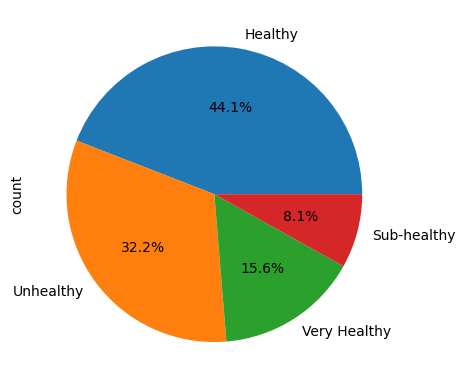

In [9]:
#the proportions
df['Health_Status'].value_counts().plot.pie(autopct='%1.1f%%')

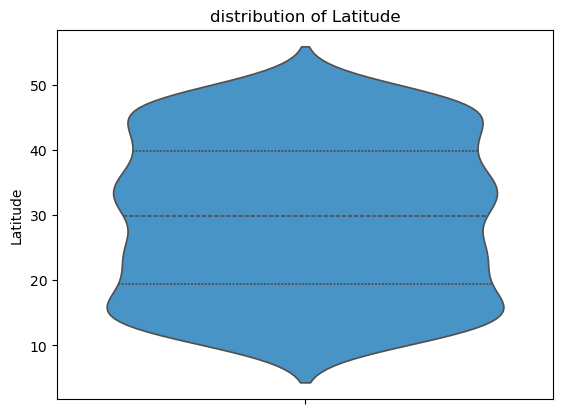

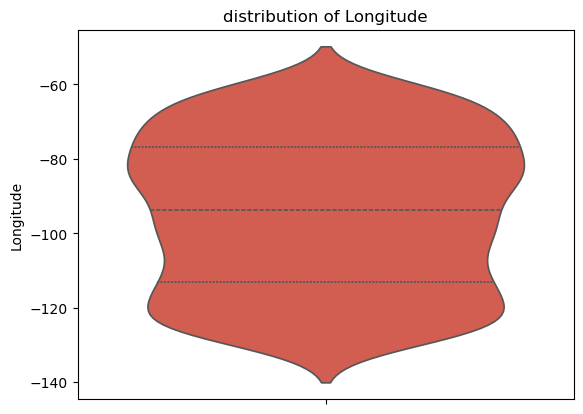

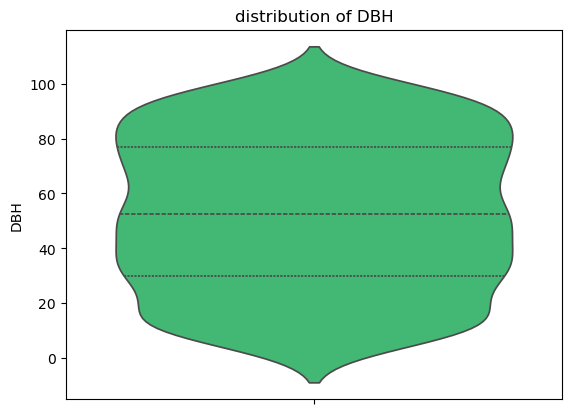

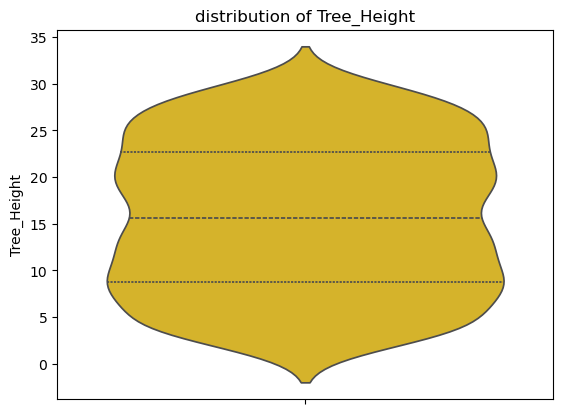

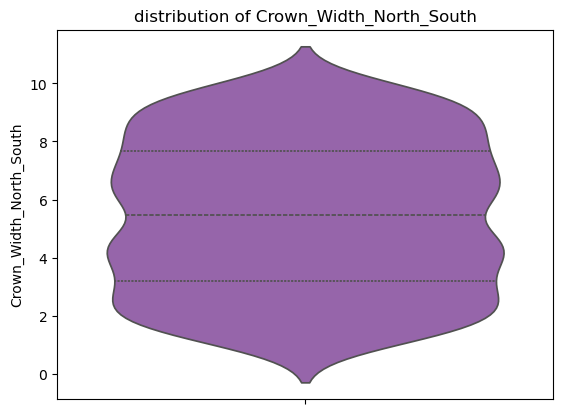

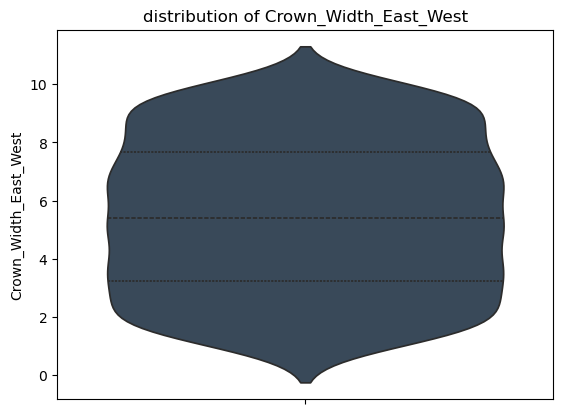

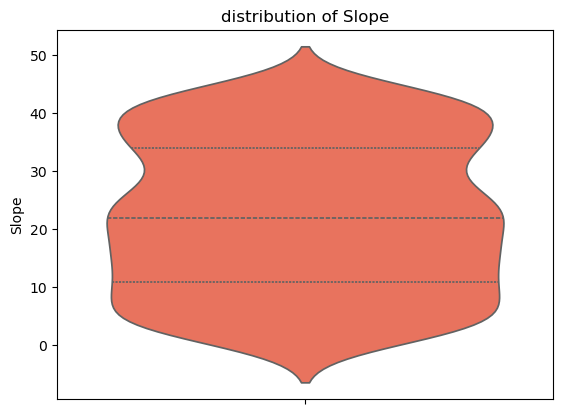

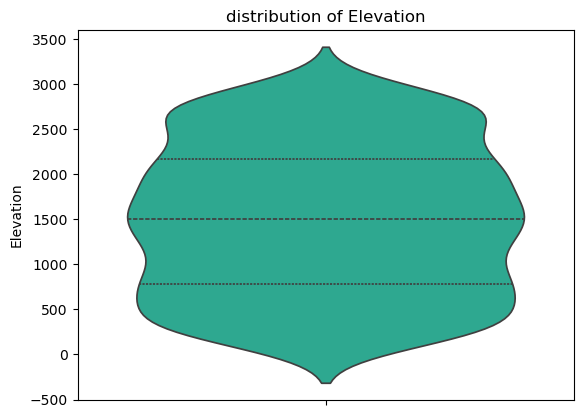

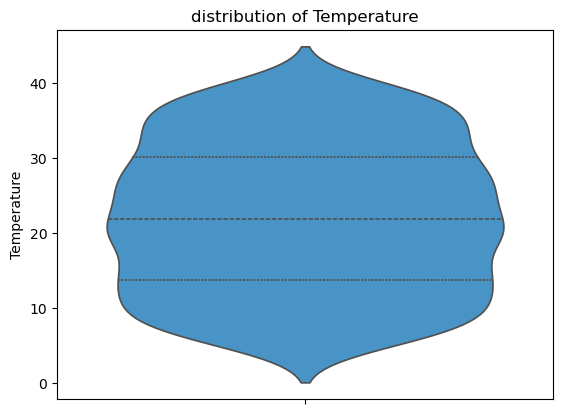

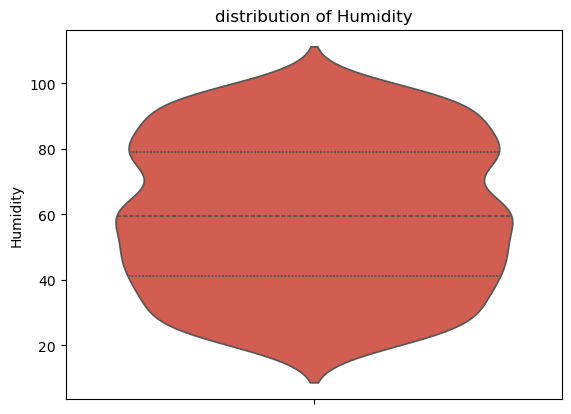

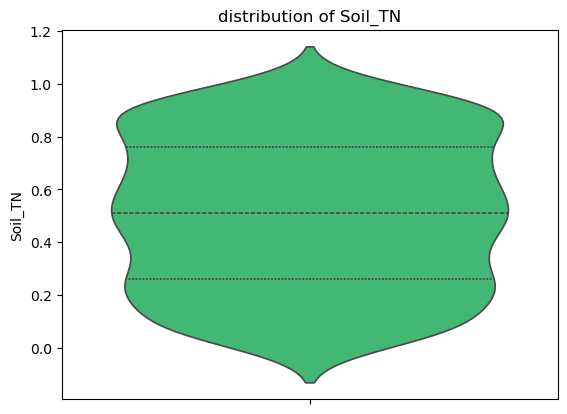

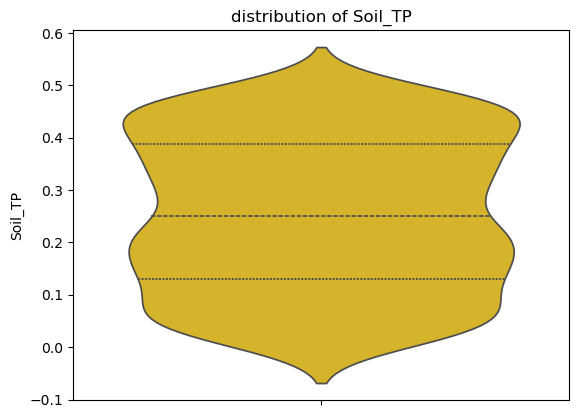

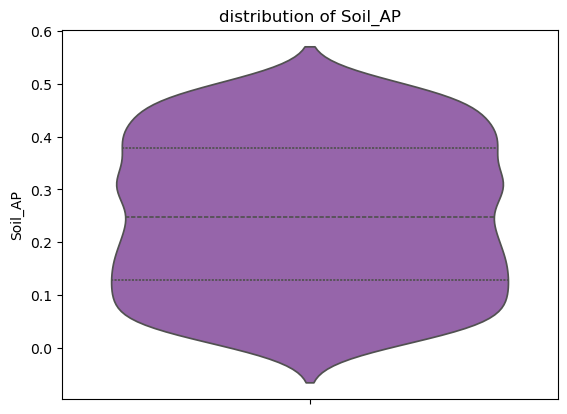

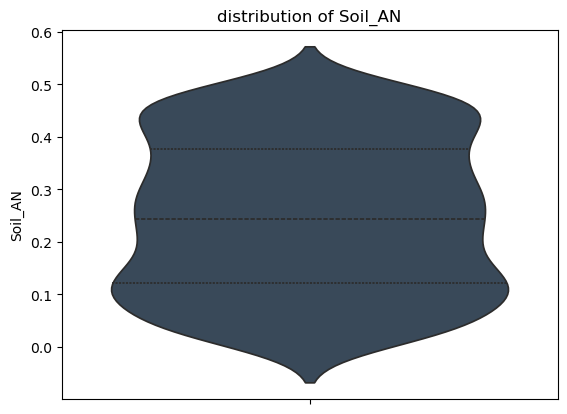

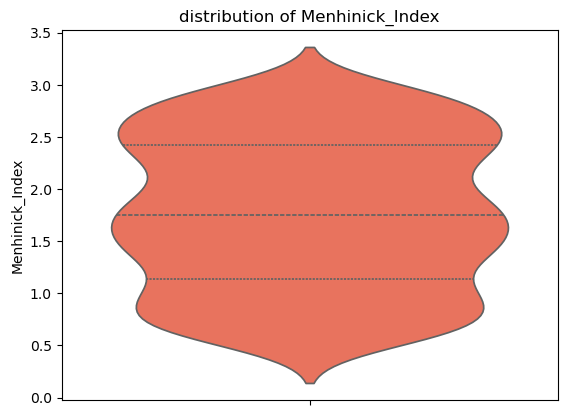

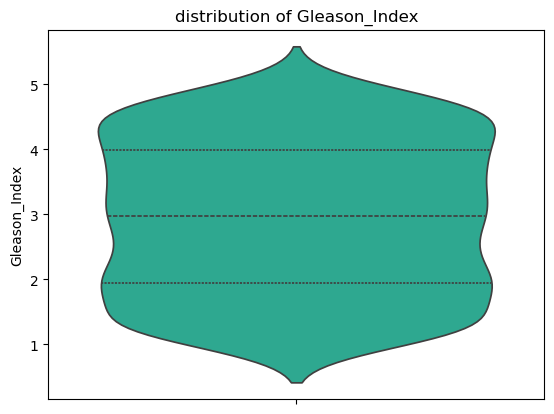

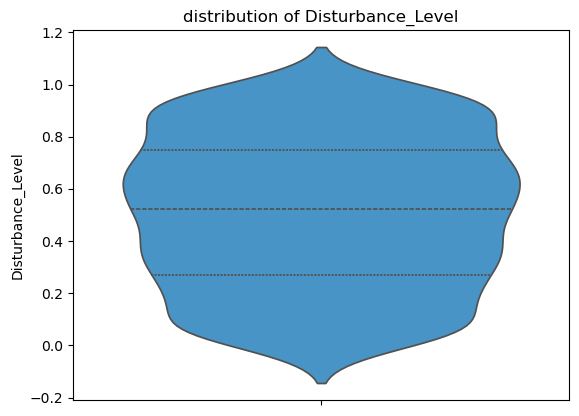

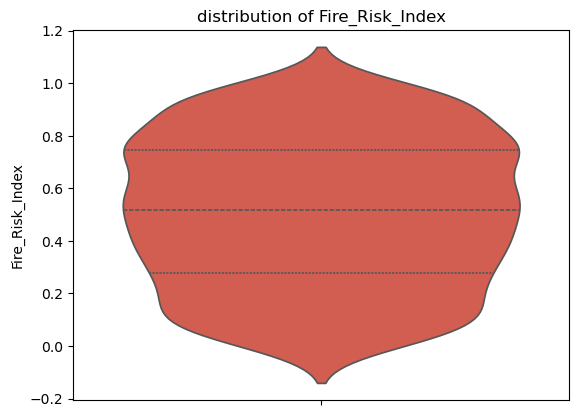

In [38]:
#check outliers 
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#34495e', '#ff6347', '#1abc9c']
for idx,i in enumerate(df.select_dtypes(include='float')):
    plt.figure()
    sns.violinplot(df[i],inner="quart",color=colors[idx % len(colors)])
    plt.title(f'distribution of {i}')
    plt.show()

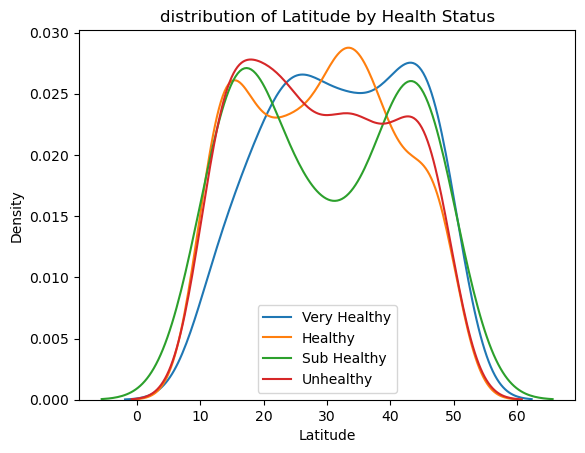

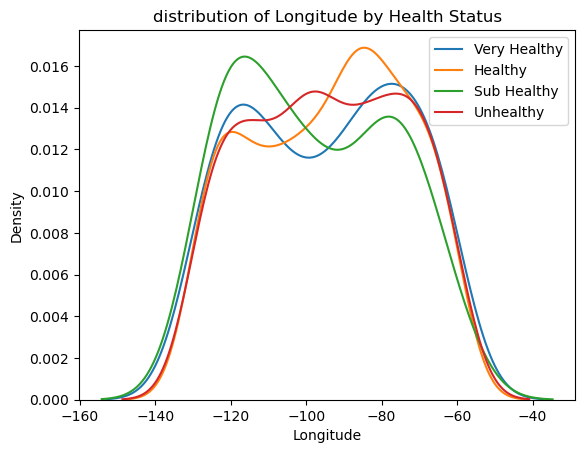

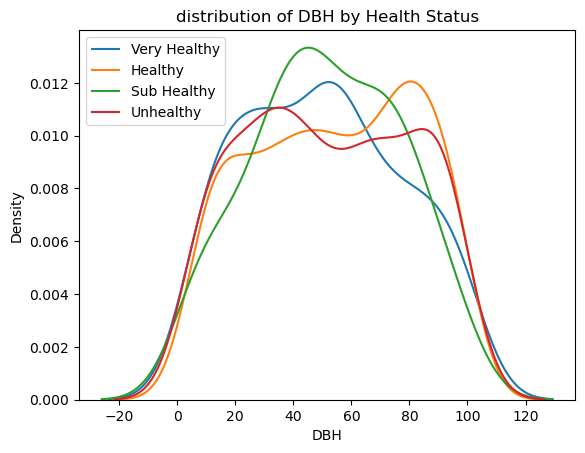

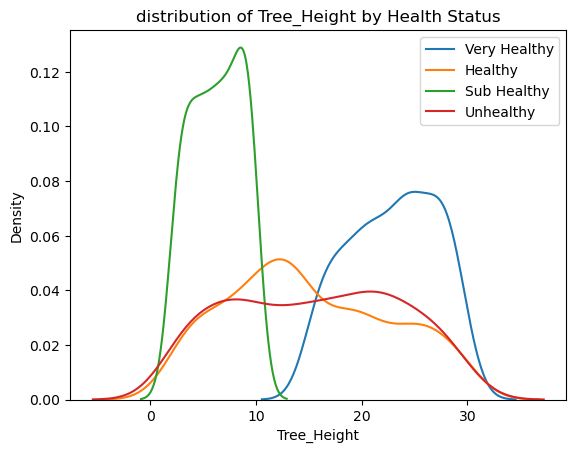

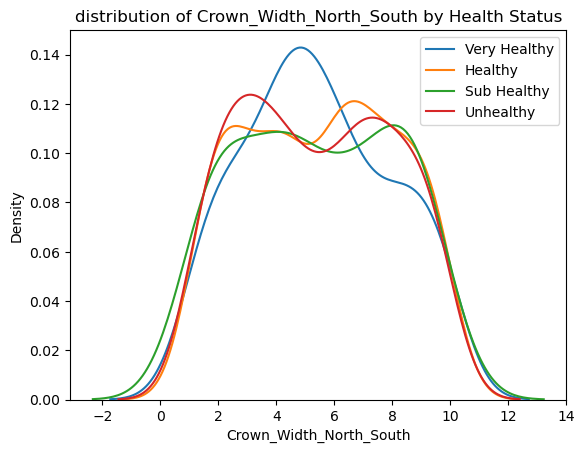

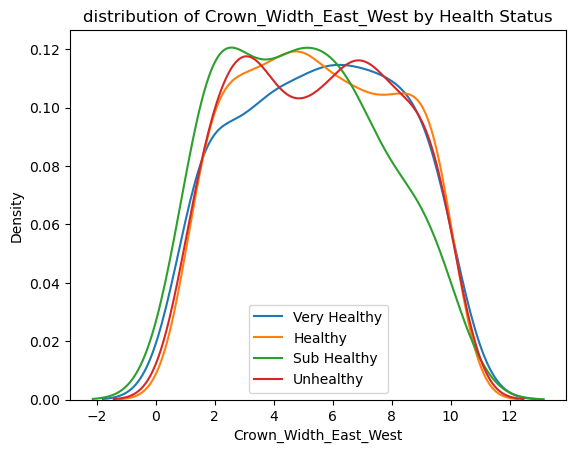

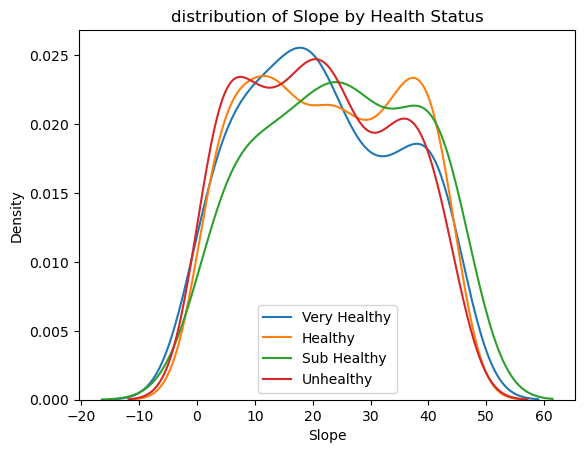

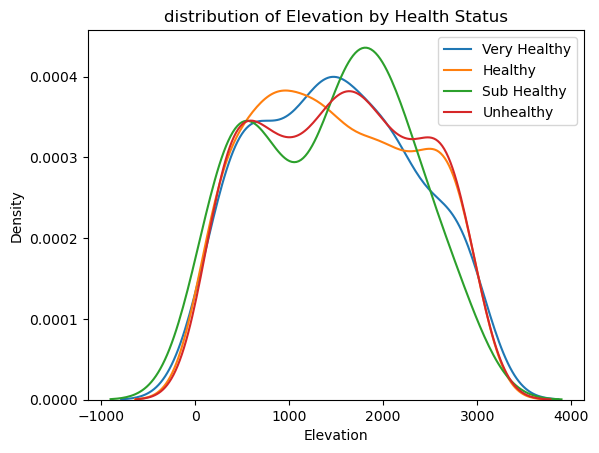

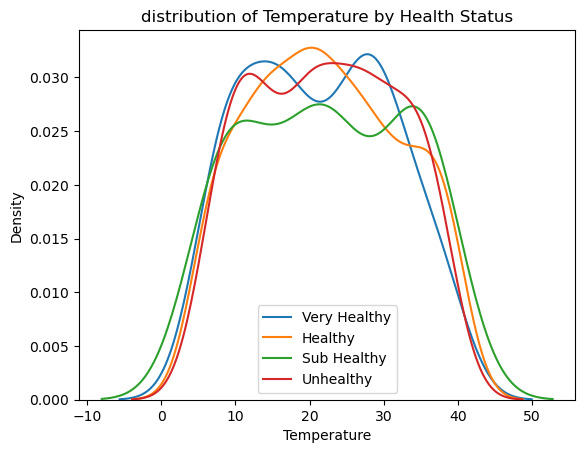

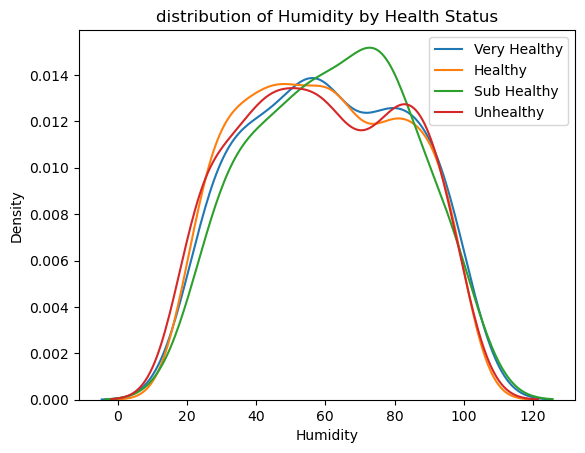

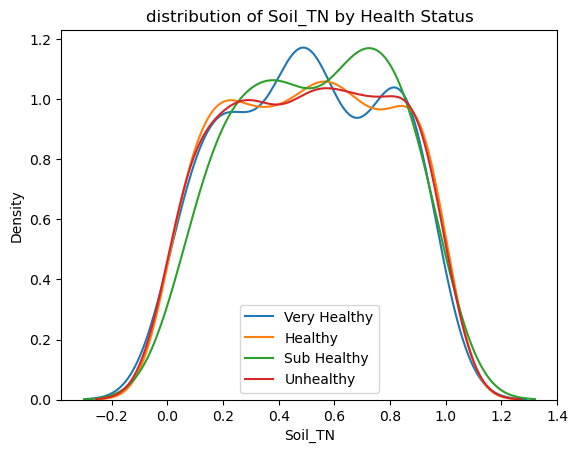

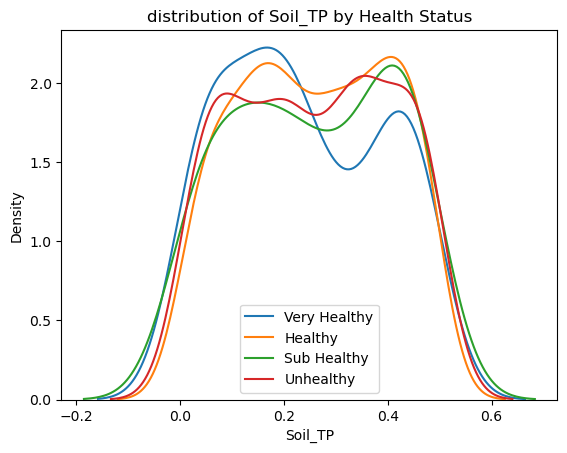

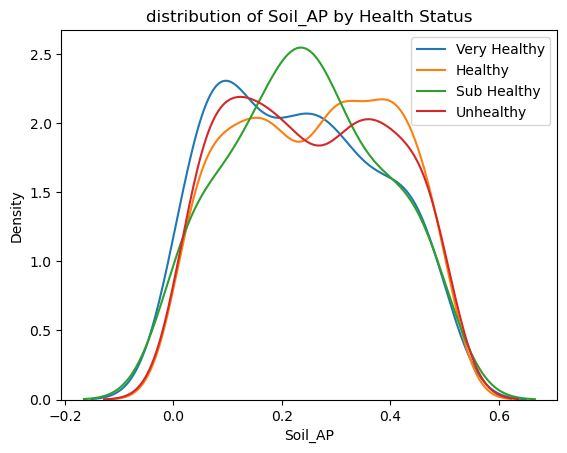

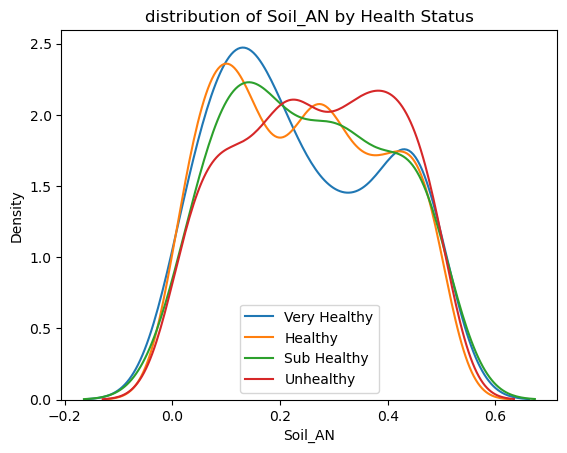

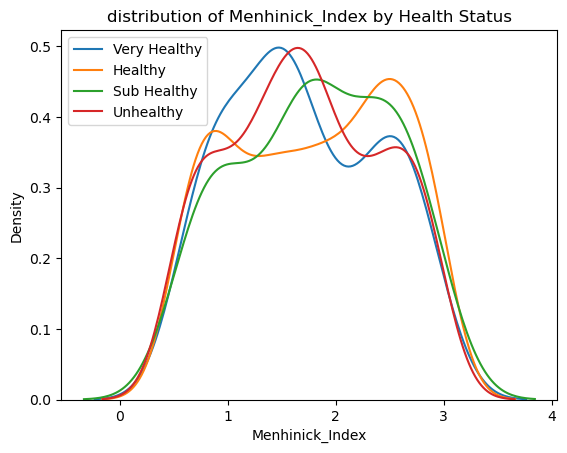

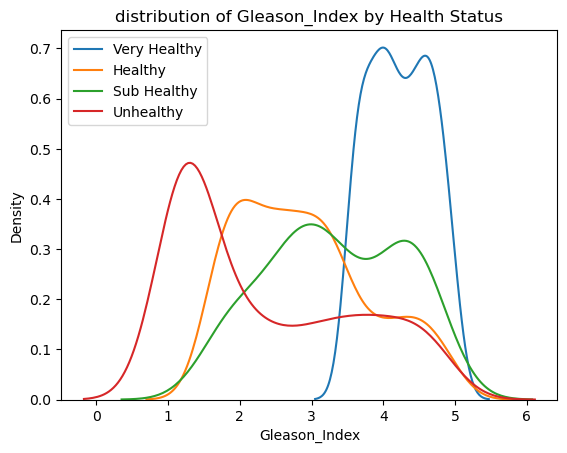

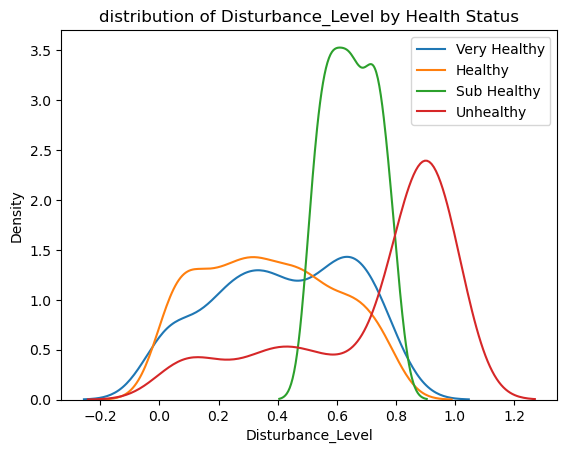

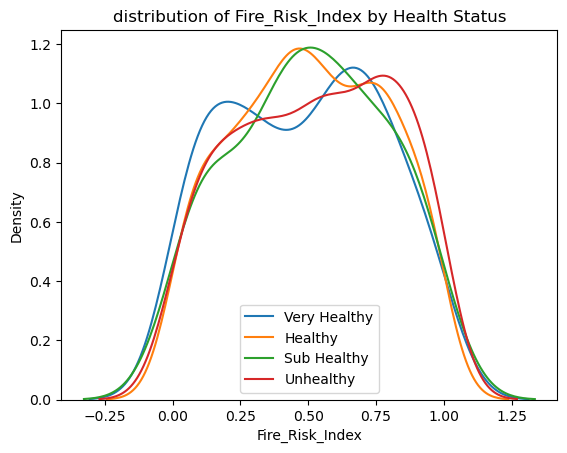

In [11]:
#the distribution of numerical features by health state
v_healthy = df[df['Health_Status'] == 'Very Healthy']
healthy =df[df['Health_Status'] == 'Healthy']
s_healthy = df[df['Health_Status'] == 'Sub-healthy']
unhealthy = df[df['Health_Status'] == 'Unhealthy']

for k in df.select_dtypes(include = 'float' ):
    plt.figure()
    sns.kdeplot(v_healthy[k], label='Very Healthy')
    sns.kdeplot(healthy[k], label='Healthy')
    sns.kdeplot(s_healthy[k], label='Sub Healthy')
    sns.kdeplot(unhealthy[k], label='Unhealthy')
    plt.title(f'distribution of {k} by Health Status')
    plt.legend()

<Axes: >

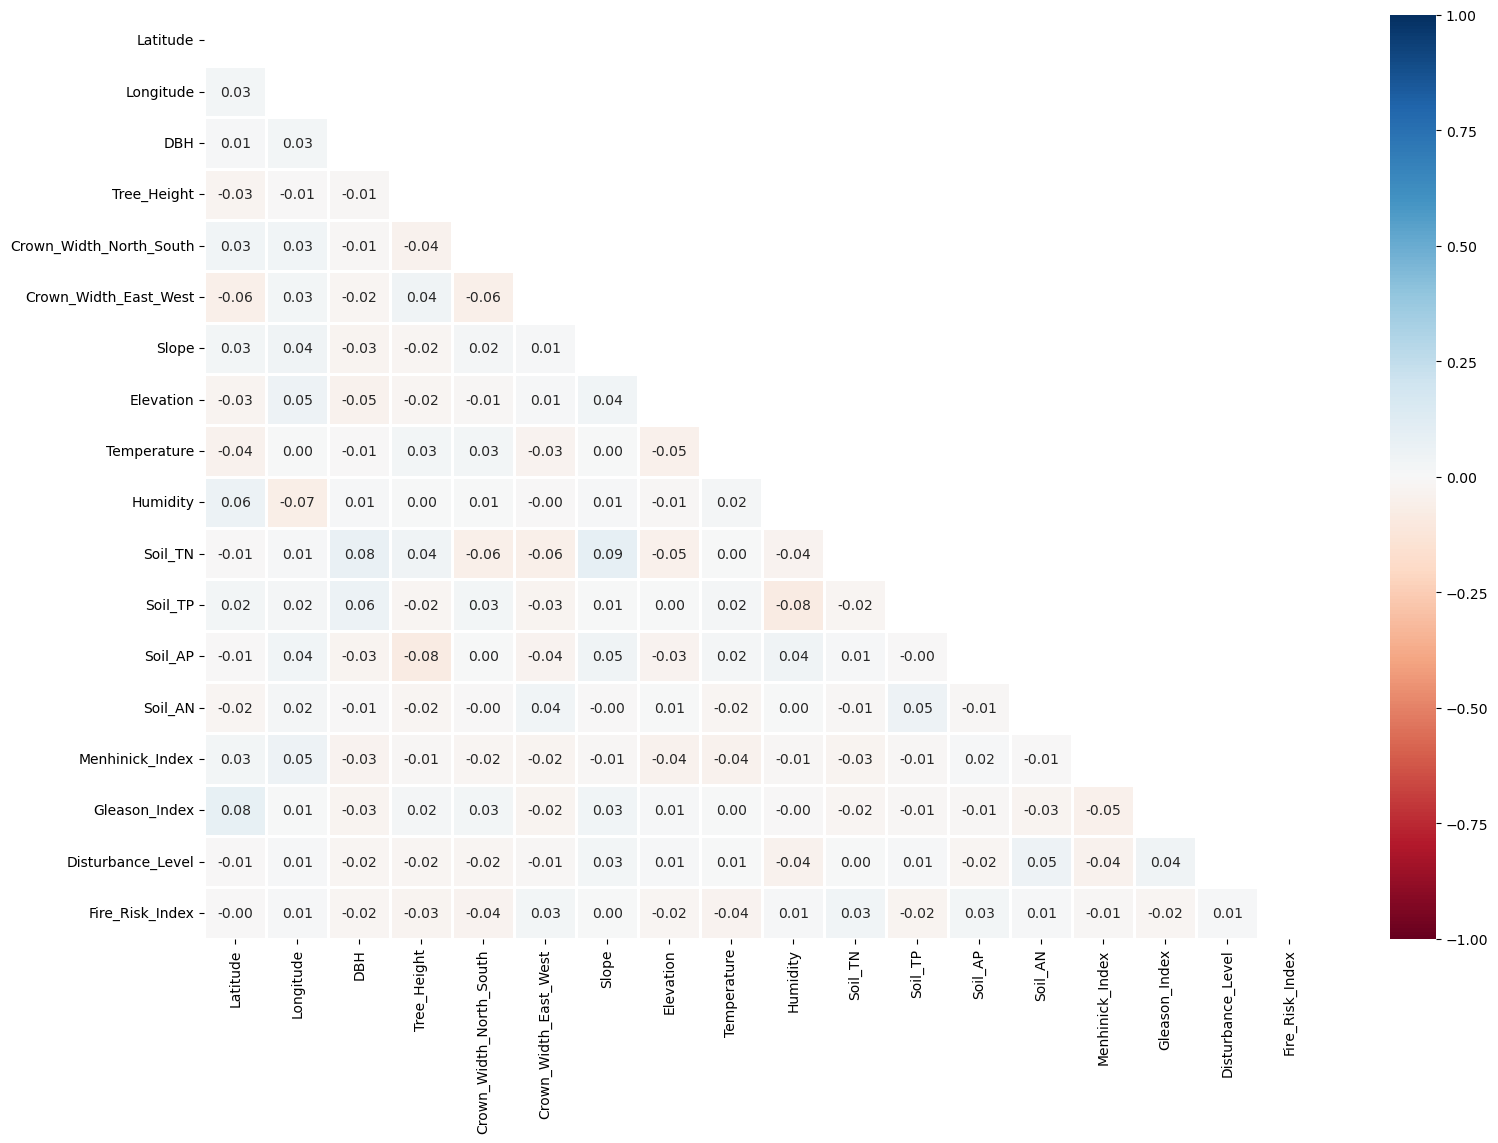

In [12]:
#bivariate analysis
num = df.select_dtypes(include='float')
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(num.corr(), dtype=bool))
sns.heatmap(num.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

In [34]:
#display trees on a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],tooltip="Point #{}".format(index + 1)).add_to(m)
m.save('trees.html')


In [35]:
m

Text(0.5, 1.0, 'Tree Diameter vs Height by Health Status')

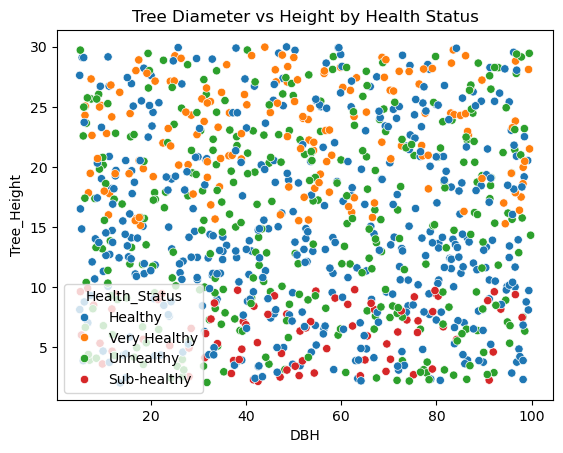

In [81]:
sns.scatterplot(x='DBH',y='Tree_Height',hue='Health_Status' ,data=df)
plt.title('Tree Diameter vs Height by Health Status')

Text(0.5, 1.0, 'Disturbance Level vs Slope by Health Status')

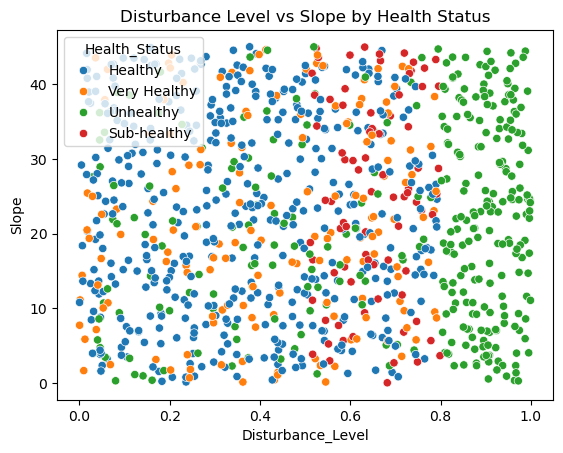

In [82]:
sns.scatterplot(y="Slope",x='Disturbance_Level',hue='Health_Status' ,data=df)
plt.title('Disturbance Level vs Slope by Health Status')

Text(0.5, 1.0, 'Disturbance Level by Health Status')

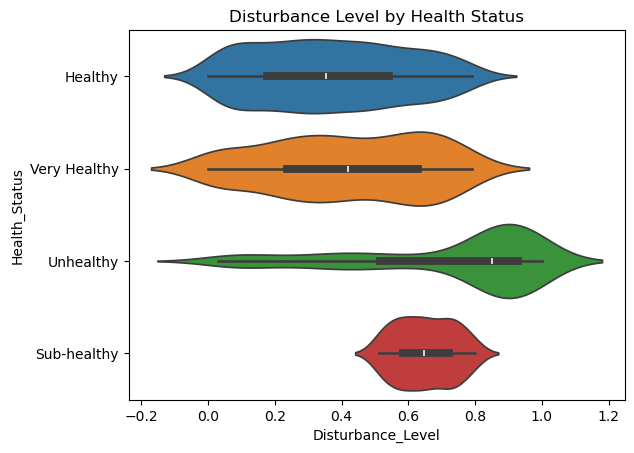

In [83]:
sns.violinplot(y='Health_Status',x='Disturbance_Level', hue='Health_Status' ,data=df)
plt.title('Disturbance Level by Health Status')

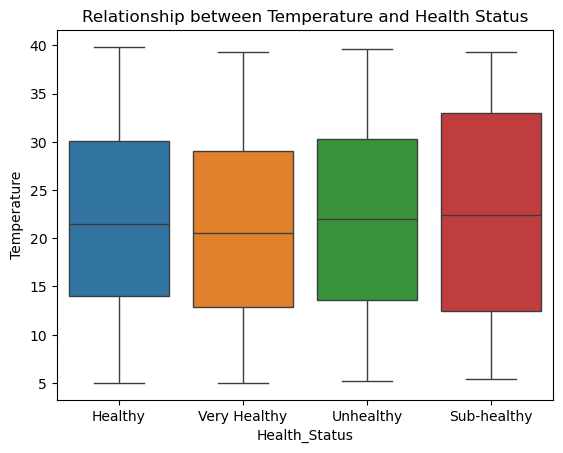

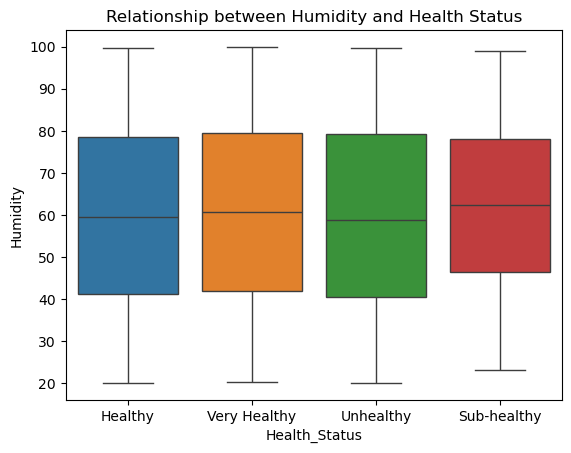

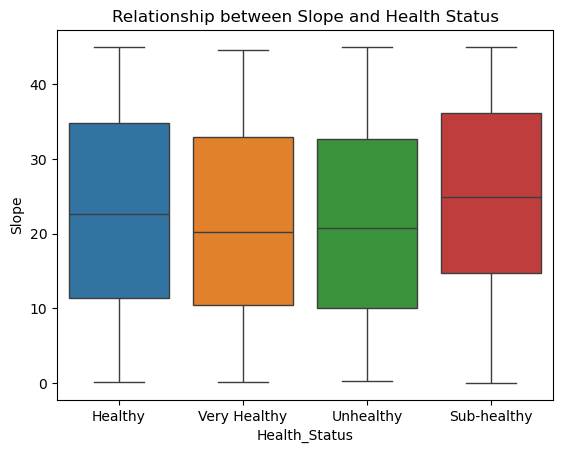

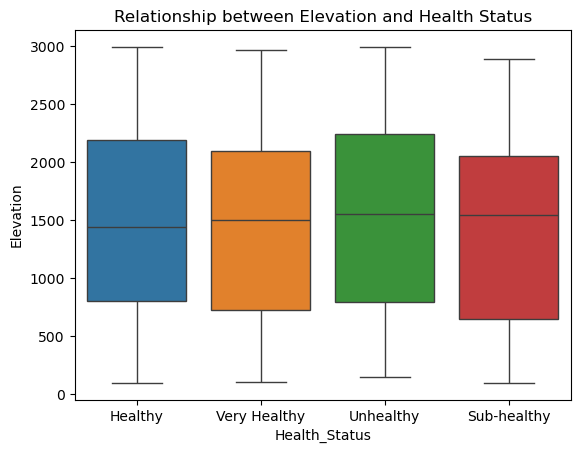

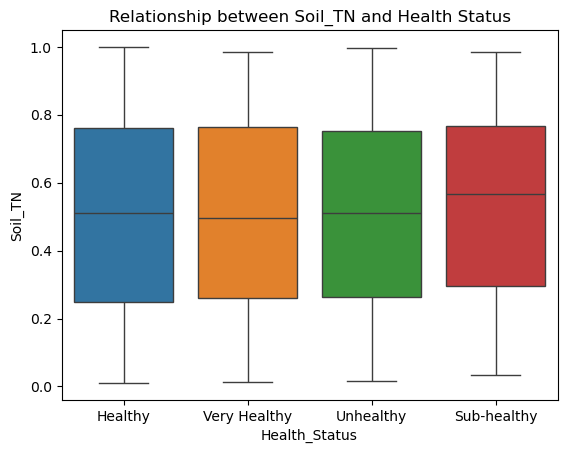

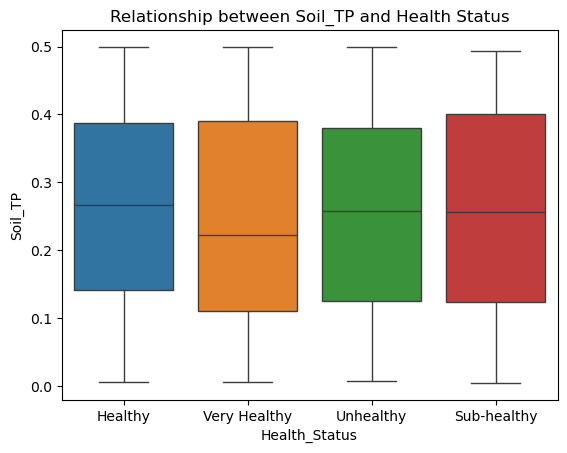

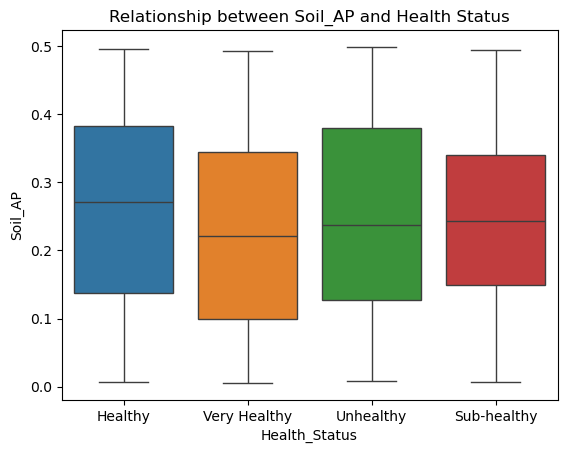

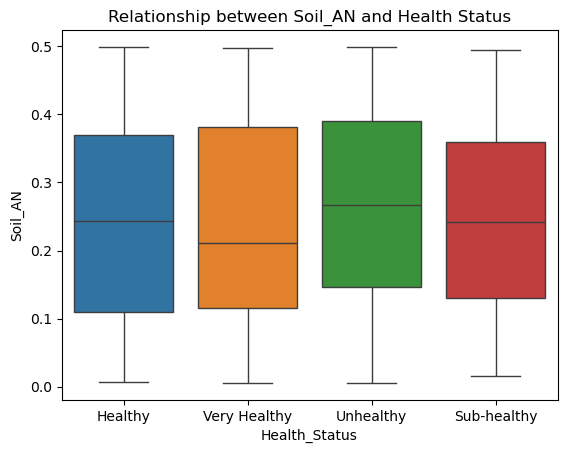

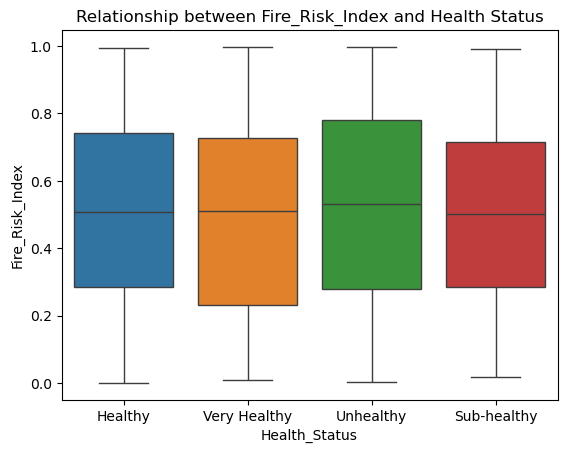

In [58]:
env_factors = ['Temperature', 'Humidity', 'Slope', 'Elevation', 'Soil_TN', 'Soil_TP', 'Soil_AP', 'Soil_AN', 'Fire_Risk_Index']
for f in env_factors:
    plt.figure()
    sns.boxplot(y=df[f], x=df['Health_Status'], hue=df['Health_Status'])
    plt.title(f'Relationship between {f} and Health Status')

Text(0.5, 1.0, 'Crown Width East West by Health Status')

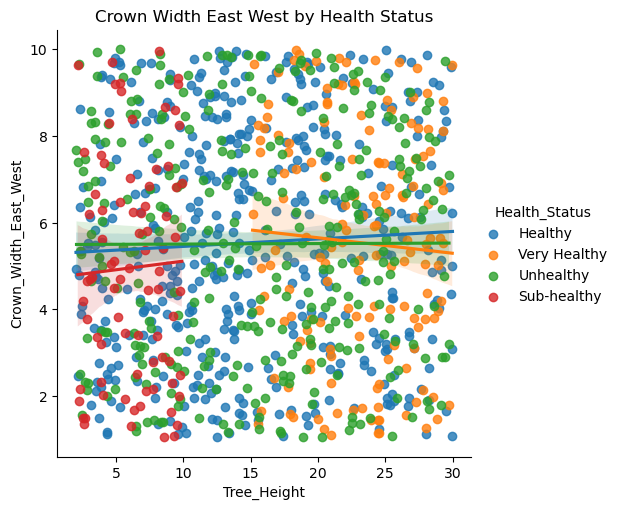

In [84]:
sns.lmplot(y='Crown_Width_East_West',x='Tree_Height', hue='Health_Status', data=df)
plt.title('Crown Width East West by Health Status')


Text(0.5, 1.0, 'Crown Width North South by Health Status')

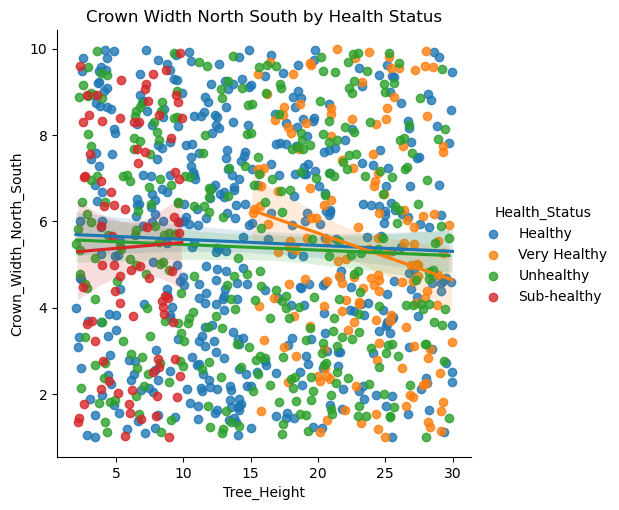

In [85]:
sns.lmplot(y='Crown_Width_North_South',x='Tree_Height', hue='Health_Status', data=df)
plt.title('Crown Width North South by Health Status')

Text(0.5, 1.0, 'Gleason Index vs Temperature')

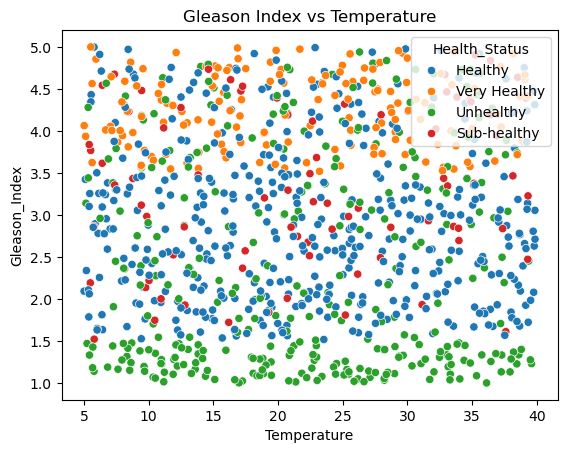

In [89]:
sns.scatterplot(y='Gleason_Index', x='Temperature', hue='Health_Status', data=df)
plt.title('Gleason Index vs Temperature')

# MODELING

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


df['Health_Status'] = LabelEncoder().fit_transform(df['Health_Status'])

In [99]:
X = df.drop(columns=['Plot_ID','Health_Status'], axis=1)
y = df[['Health_Status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       1.00      0.72      0.84        18
           2       1.00      1.00      1.00        65
           3       1.00      0.97      0.98        31

    accuracy                           0.97       200
   macro avg       0.98      0.92      0.95       200
weighted avg       0.97      0.97      0.97       200

0.97


In [107]:
logis = LogisticRegression()
logis.fit(X_train, y_train)
pred = logis.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        86
           1       0.40      0.33      0.36        18
           2       0.63      0.72      0.67        65
           3       0.75      0.58      0.65        31

    accuracy                           0.66       200
   macro avg       0.62      0.58      0.60       200
weighted avg       0.66      0.66      0.65       200

0.655


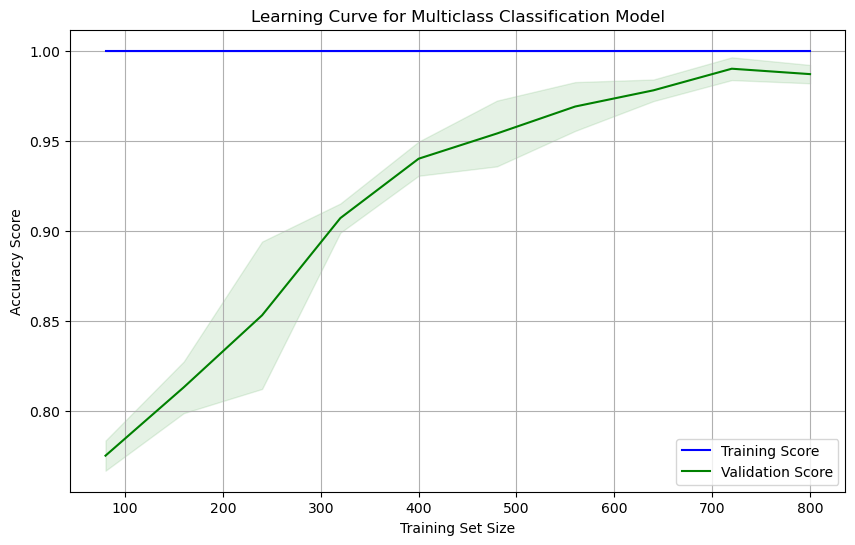

In [125]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.1)

# Add labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Multiclass Classification Model")
plt.legend(loc="best")
plt.grid()
plt.show()

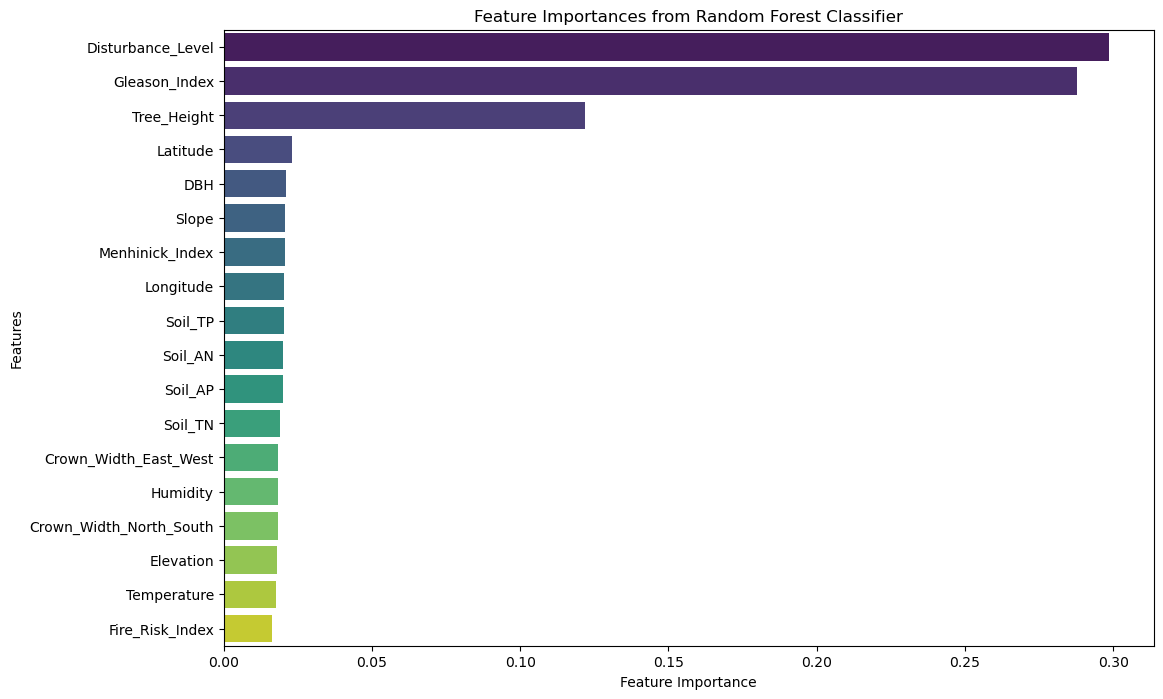

In [128]:
feature_names = ["Latitude", "Longitude", "DBH", "Tree_Height", "Crown_Width_North_South", 
                 "Crown_Width_East_West", "Slope", "Elevation", "Temperature", "Humidity", 
                 "Soil_TN", "Soil_TP", "Soil_AP", "Soil_AN", "Menhinick_Index", "Gleason_Index", 
                 "Disturbance_Level", "Fire_Risk_Index"]
# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances and feature names
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot feature importances with color for each bar
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest Classifier")
plt.show()

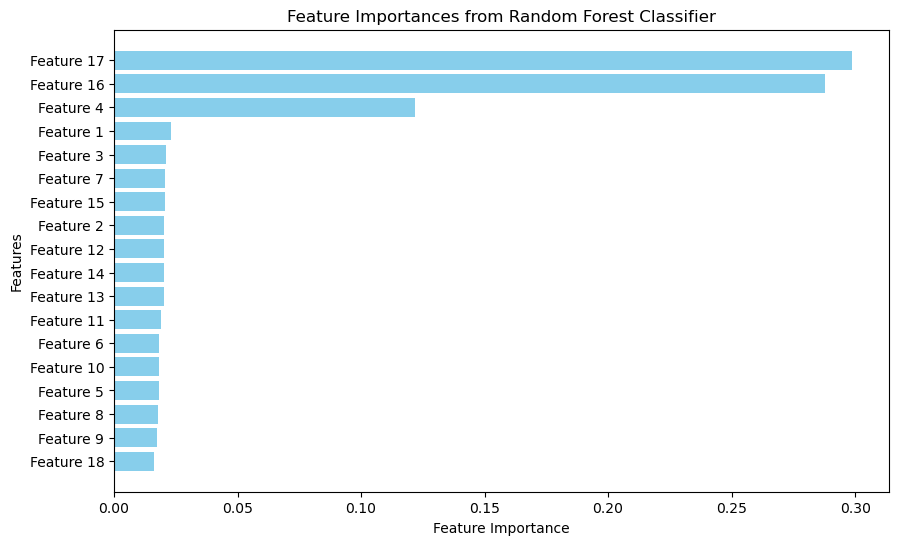

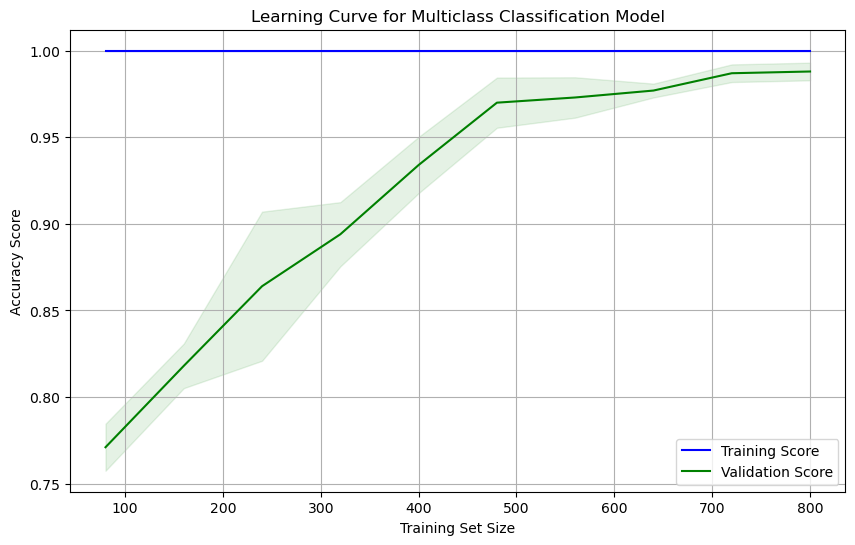